In [ ]:
import os
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import logging
from pathlib import Path

# --- (Recomendado) Recarga automática de módulos ---
%load_ext autoreload
%autoreload 2

# --- Configuración de Paths ---
project_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Añadido al path: {project_root}")

# --- Rutas de Datos ---
RAW_DATA_PATH = "../data/raw/color"
PROCESSED_DATA_PATH = "../data/processed/"
os.makedirs(PROCESSED_DATA_PATH, exist_ok=True)

print("Configuración inicial completada.")

Añadido al path: c:\Users\adria\OneDrive\Documentos\AI specialization\4 - Computer Vision II\vision_computadora_II-master\VpC2
Configuración inicial completada.


In [2]:
# --- Carga de Datos ---
try:
    dataframe_path_full = os.path.join(PROCESSED_DATA_PATH, "dataframe.csv")
    df_full = pd.read_csv(dataframe_path_full)

    dataframe_path_split = os.path.join(PROCESSED_DATA_PATH, "dataframe_splitted.csv")
    df_split = pd.read_csv(dataframe_path_split)
    
    # Prepara el DataFrame de entrenamiento con rutas completas
    df_train_original = df_split[df_split['split'] == 'train'].copy()
    df_train_original['image_path'] = df_train_original['relative_path'].apply(
        lambda rel_path: os.path.join(RAW_DATA_PATH, rel_path)
    )
    
    # Obtener los conteos del dataset COMPLETO para tomar decisiones
    full_counts = df_full['class'].value_counts()

    print(f"Cargado el set de entrenamiento original con {len(df_train_original)} muestras.")
    print(f"Cargado el set de datos completo con {len(df_full)} muestras para análisis de conteos.")

except FileNotFoundError as e:
    print(f"Error: No se encontró un archivo de datos necesario.")
    print(e)
    df_train_original = None

Cargado el set de entrenamiento original con 38013 muestras.
Cargado el set de datos completo con 54305 muestras para análisis de conteos.


Todas las funciones han sido definidas y corregidas.
Mostrando ejemplos de 'augment_random' para la clase: Orange Haunglongbing_(Citrus_greening)


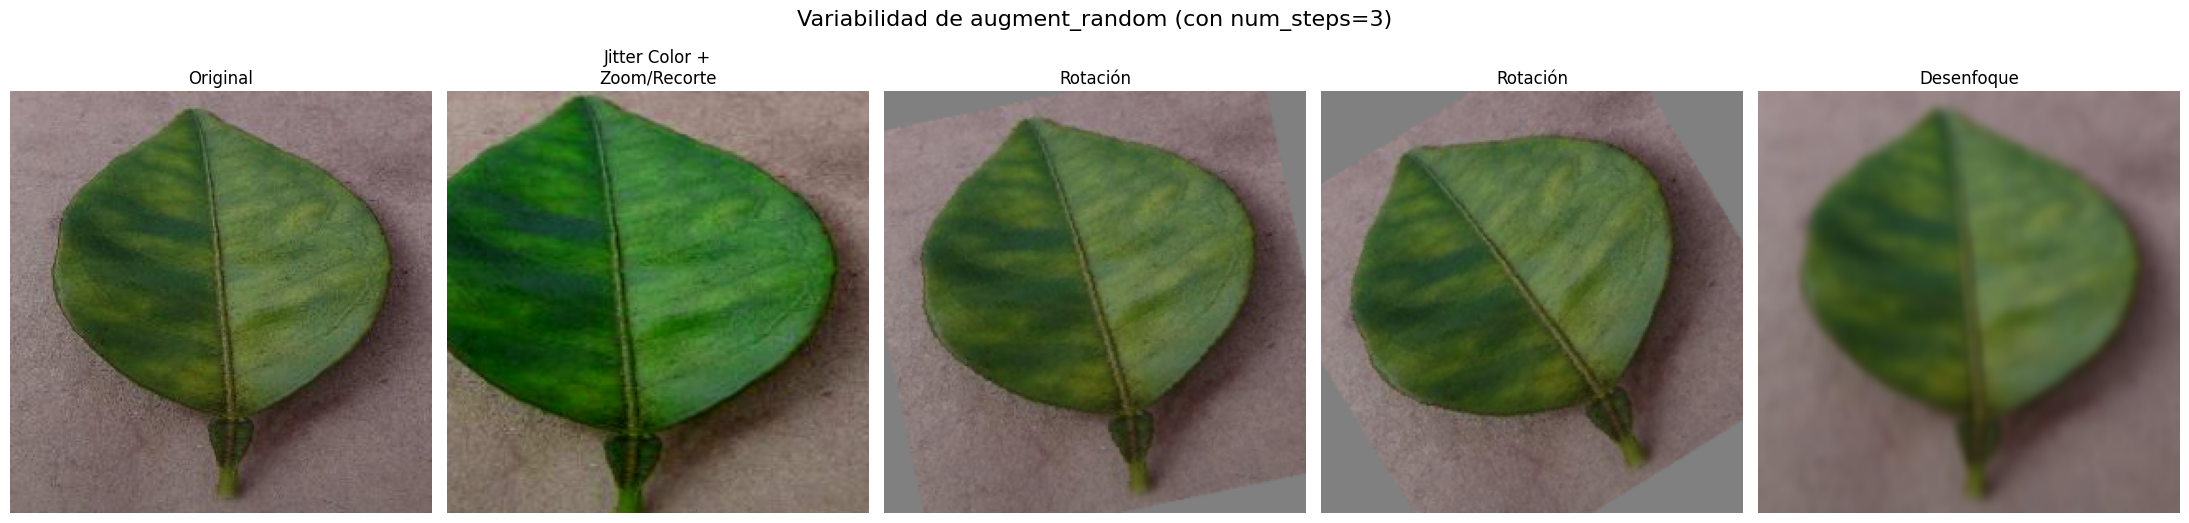

Mostrando ejemplos de 'augment_random' para la clase: Tomato Tomato_Yellow_Leaf_Curl_Virus


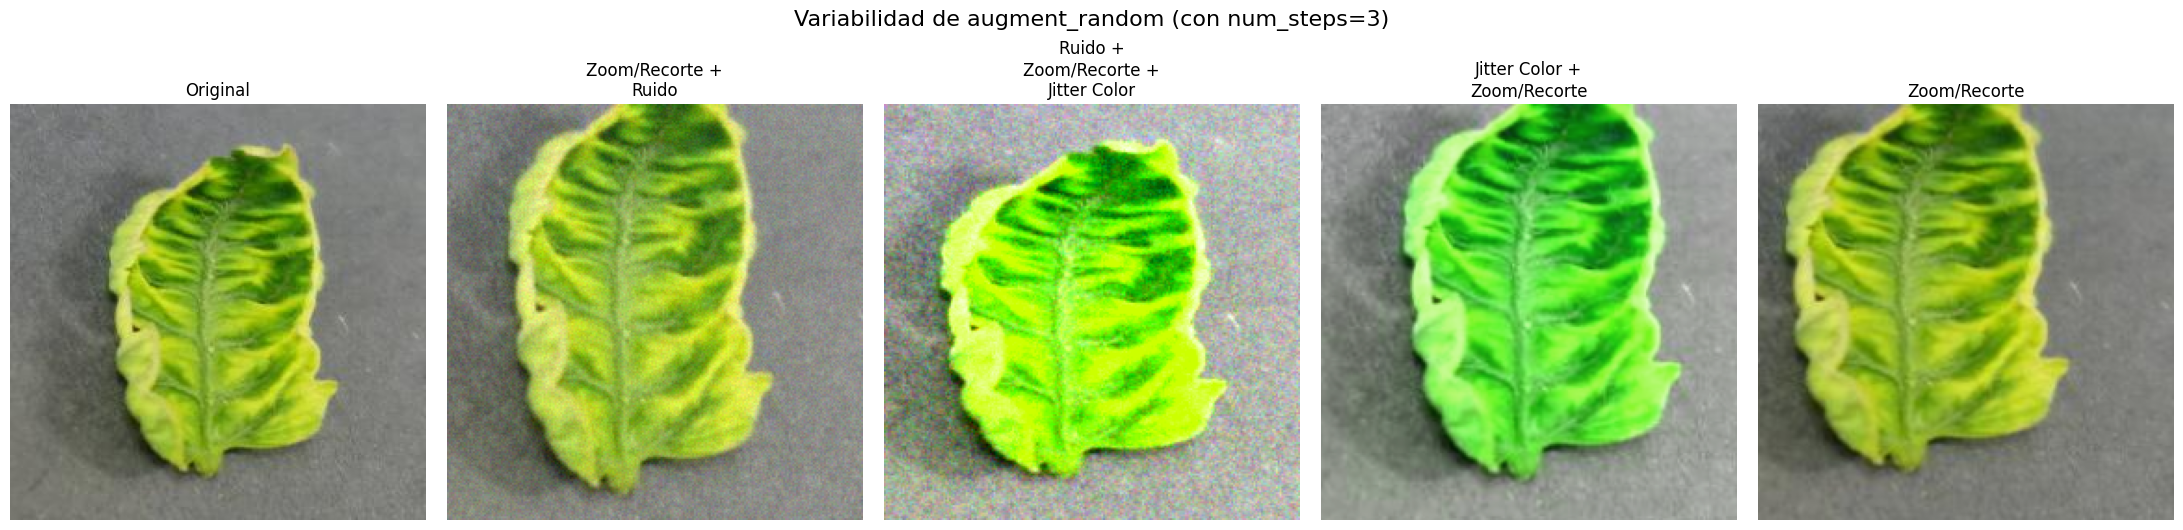

Mostrando ejemplos de 'augment_random' para la clase: Tomato Tomato_Yellow_Leaf_Curl_Virus


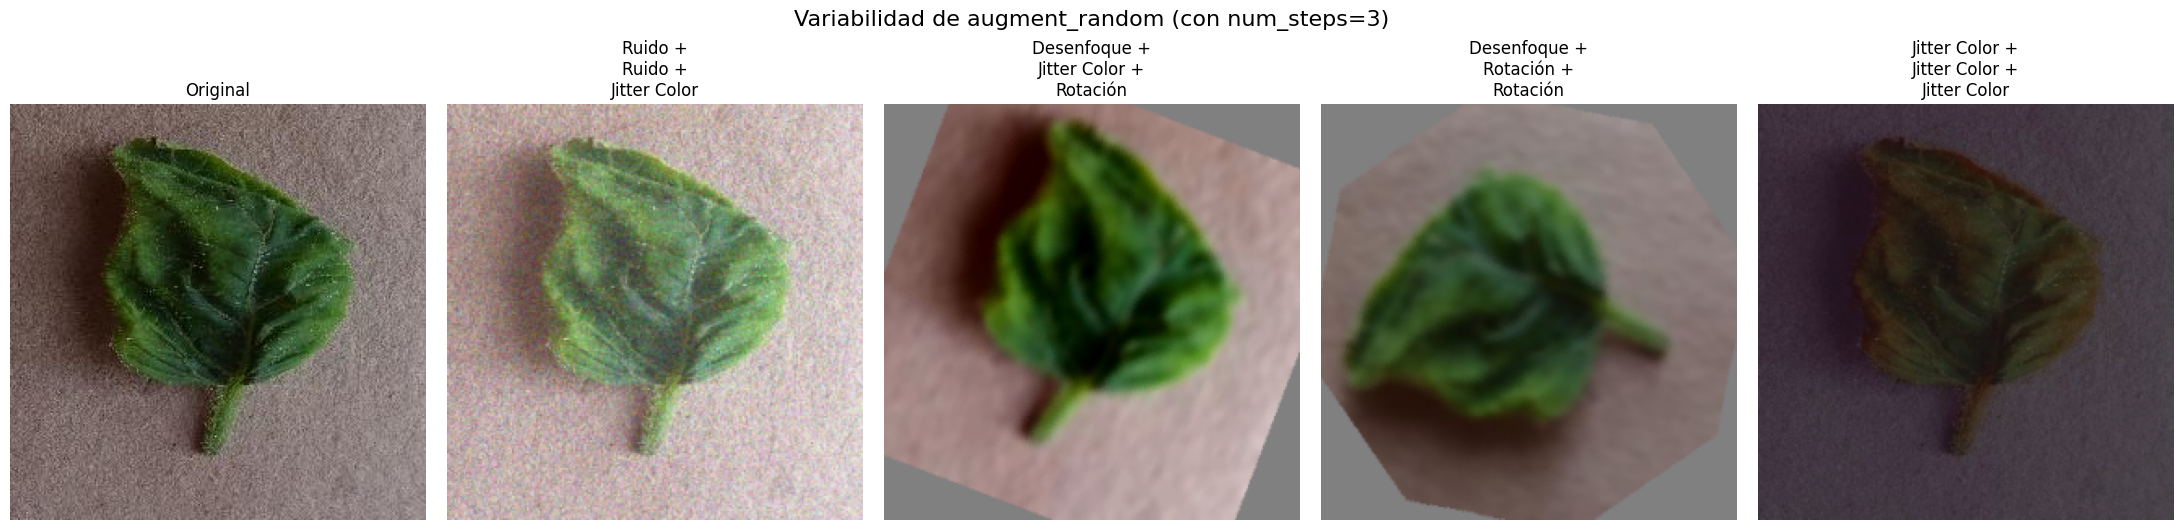

Mostrando ejemplos de 'augment_random' para la clase: Soybean healthy


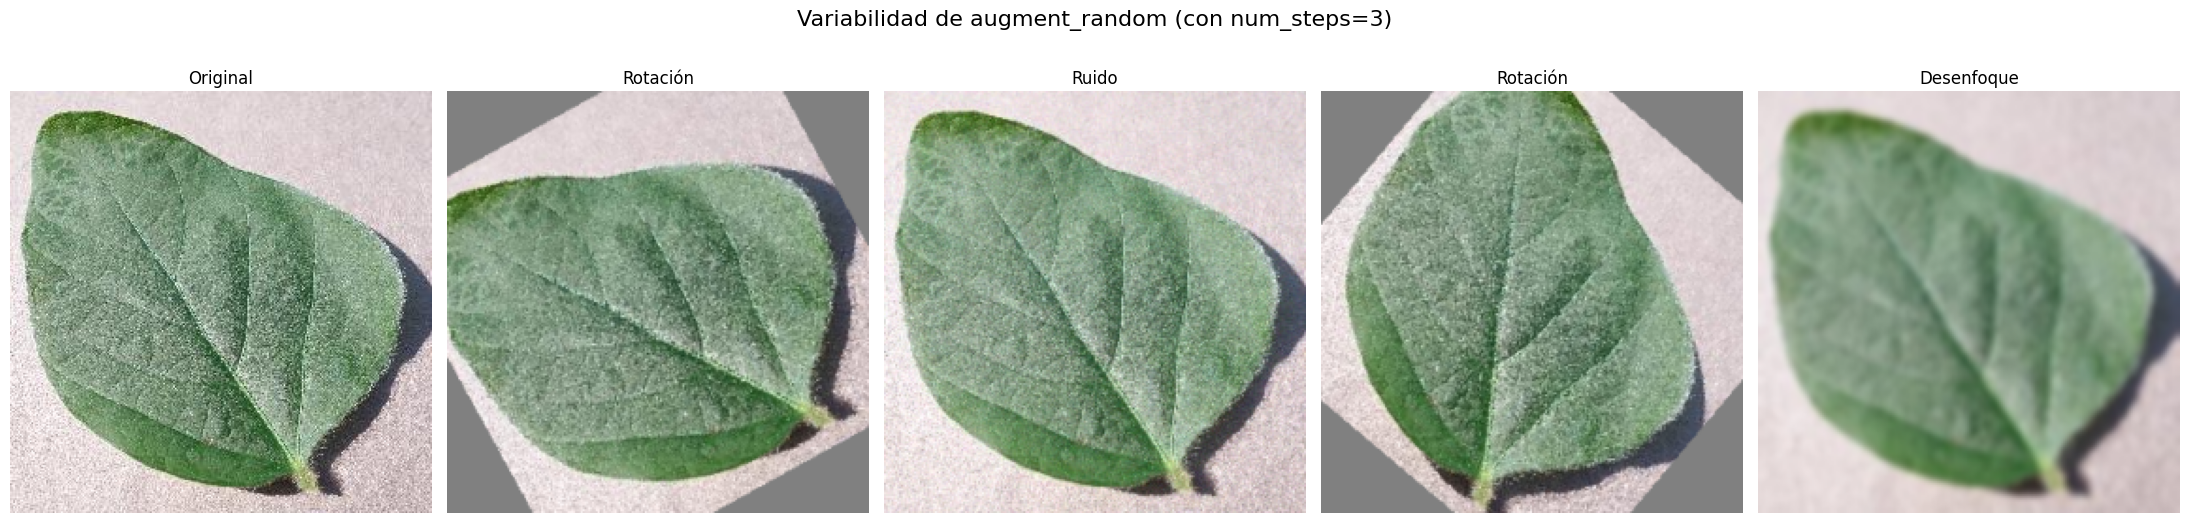

Mostrando ejemplos de 'augment_random' para la clase: Strawberry Leaf_scorch


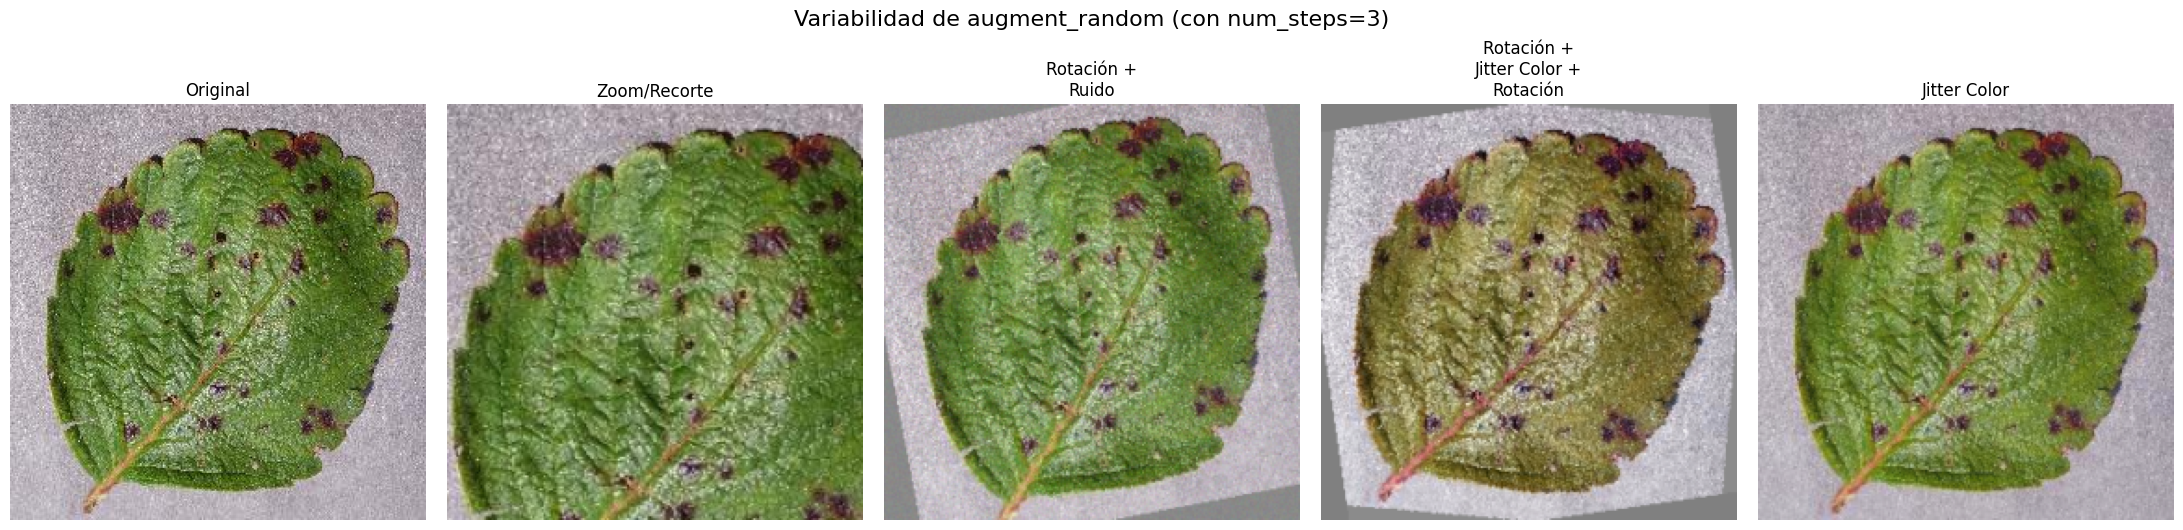

In [3]:
for i in range(0,5):   
    if 'df_train_original' in locals() and not df_train_original.empty:
        from src.visualization_utils import augment_random_plot
        augment_random_plot(df_train_original, num_calls=4, num_steps=3)
    else:
        print("El DataFrame 'df_train_original' no está definido o está vacío.")

El aumento de datos se corresponde con el propósito de generar imagenes nuevas que se correspondan a la enfermedad. La estrategia conservadora busca generar ruidos pero que no confundan demasiado a los algoritmos, ya que las enfermedades en hojas generan efectos específicos sobre el área foliar de la éstas.

In [4]:
from src.data_utils import apply_strategy_1_multiplicative, apply_strategy_2_balanced_final

# --- Ejecutar Estrategia 1 (con umbrales corregidos) ---
AUG_DIR_STRAT1 = os.path.join(PROCESSED_DATA_PATH, "augmented_images/strategy_1")
df_train_strat1 = apply_strategy_1_multiplicative(
    df_train=df_train_original,
    df_full_counts=full_counts, # Pasamos los conteos globales
    save_aug_dir=AUG_DIR_STRAT1
)
df_train_strat1.to_csv(os.path.join(PROCESSED_DATA_PATH, 'train_strategy_1.csv'), index=False)
print(f"\nDataset de Estrategia 1 guardado. Muestras totales: {len(df_train_strat1)}")

Iniciando Estrategia 1 [Multiplicativa con Umbrales Globales]...
  - Clase 'Orange___Haunglongbing_(Citrus_greening)': 3854 en train (Conteo global: 5507)
  - Clase 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 3750 en train (Conteo global: 5357)
  - Clase 'Soybean___healthy': 3563 en train (Conteo global: 5090)
  - Clase 'Peach___Bacterial_spot': 1607 en train (Conteo global: 2297)
    -> Conteo global (2297) en rango. Aplicando aumento x2. Se generarán 1607 imágenes.
  - Clase 'Tomato___Bacterial_spot': 1489 en train (Conteo global: 2127)
    -> Conteo global (2127) en rango. Aplicando aumento x2. Se generarán 1489 imágenes.
  - Clase 'Tomato___Late_blight': 1336 en train (Conteo global: 1909)
    -> Conteo global (1909) en rango. Aplicando aumento x3. Se generarán 2672 imágenes.
  - Clase 'Squash___Powdery_mildew': 1284 en train (Conteo global: 1835)
    -> Conteo global (1835) en rango. Aplicando aumento x3. Se generarán 2568 imágenes.
  - Clase 'Tomato___Septoria_leaf_spot': 1240 en t

In [5]:
# --- Ejecutar Estrategia 2 (con umbrales corregidos) ---
AUG_DIR_STRAT2 = os.path.join(PROCESSED_DATA_PATH, "augmented_images/strategy_2")
df_train_strat2 = apply_strategy_2_balanced_final(
    df_train=df_train_original,
    df_full_counts=full_counts, # Pasamos los conteos globales
    save_aug_dir=AUG_DIR_STRAT2,
    target_count=2000
)
df_train_strat2.to_csv(os.path.join(PROCESSED_DATA_PATH, 'train_strategy_2.csv'), index=False)
print(f"\nDataset de Estrategia 2 guardado. Muestras totales: {len(df_train_strat2)}")


Iniciando Estrategia 2 [Etapa 1: Over-sampling Granular]...
  - Clase 'Orange___Haunglongbing_(Citrus_greening)': 3854 en train (Conteo global: 5507)
  - Clase 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 3750 en train (Conteo global: 5357)
  - Clase 'Soybean___healthy': 3563 en train (Conteo global: 5090)
  - Clase 'Peach___Bacterial_spot': 1607 en train (Conteo global: 2297)
    -> Aumentando x2. Se generarán 1607 nuevas imágenes.
  - Clase 'Tomato___Bacterial_spot': 1489 en train (Conteo global: 2127)
    -> Aumentando x2. Se generarán 1489 nuevas imágenes.
  - Clase 'Tomato___Late_blight': 1336 en train (Conteo global: 1909)
    -> Aumentando x2. Se generarán 1336 nuevas imágenes.
  - Clase 'Squash___Powdery_mildew': 1284 en train (Conteo global: 1835)
    -> Aumentando x2. Se generarán 1284 nuevas imágenes.
  - Clase 'Tomato___Septoria_leaf_spot': 1240 en train (Conteo global: 1771)
    -> Aumentando x2. Se generarán 1240 nuevas imágenes.
  - Clase 'Tomato___Spider_mites Two-spotted_


--- Generando comparación final de las estrategias de muestreo ---


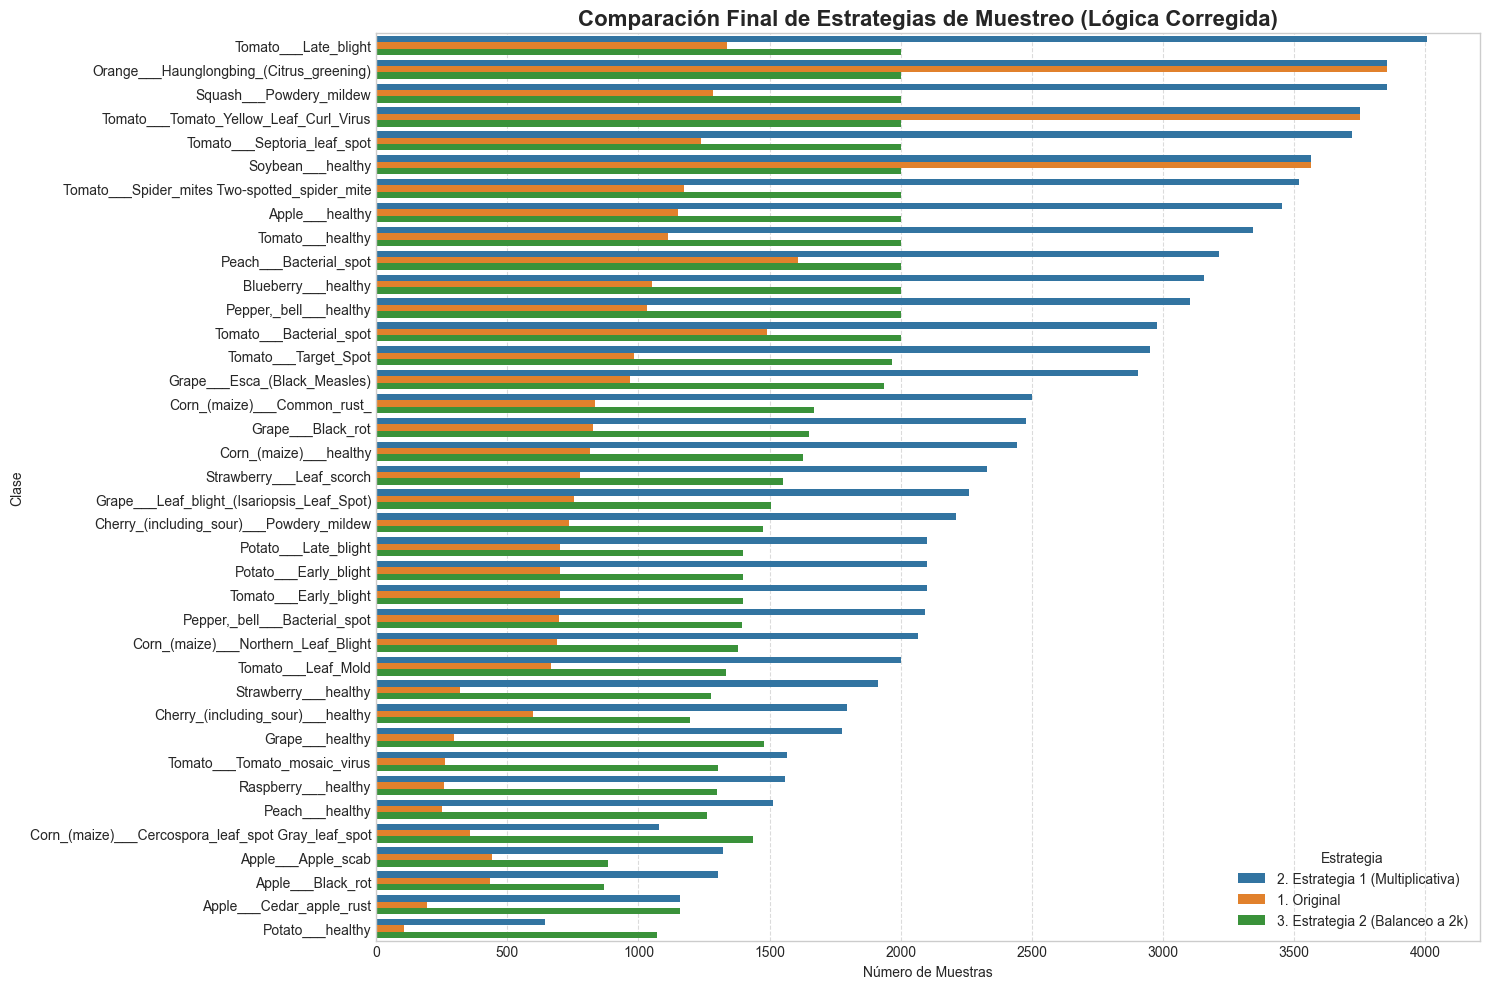

In [6]:
from src.visualization_utils import plot_class_distribution
# --- Visualización Comparativa Final ---
print("\n--- Generando comparación final de las estrategias de muestreo ---")
plot_class_distribution(
    dfs=[df_train_original, df_train_strat1, df_train_strat2],
    labels=['1. Original', '2. Estrategia 1 (Multiplicativa)', '3. Estrategia 2 (Balanceo a 2k)'],
    title='Comparación Final de Estrategias de Muestreo (Lógica Corregida)'
)

Se generaron dos estrageias de aumento de datos, uno que busca simplemente aumentar las clases minoritarias (estrategia 1), donde cuanto menos tengan las clases mas se aumentan. La segunda estrategia, busca emparejar mas las clases limitando a las clases a un maximo de 2.000 de imagenes (estrategia 2).